## Karhunen-Loeve 

In [1]:
#imports
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from tqdm import tqdm

Για την εύρεση των eigenvalues και eigenfunctions πρέπει να βρούμε αριθμητική λύση για τους τύπους $(2.25)$ και $(2.28)$ του βιβλίου, στα αντίστοιχα διαστήματα. Για τον λόγο αυτό χρησιμοποιούμε το [`scipy.optimize.fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html), το οποίο μας επιστρέφει τις ρίζες μιας μη γραμμικής εξίσωσης ξεκινώντας από μια αριθμητική τιμή που ορίζουμε. Κατόπιν, αντικαθιστούμε κατά σειρά στους τύπους $(2.24)$ και $(2.26)$ και τέλος αντικαθιστούμε αυτά που υπολογίσαμε στην $(2.19)$ για να λάβουμε το KL-expansion.

In [2]:
# ορισμός τύπου 2.25
def f_odd(x):
    return 1/b - x * np.tan(x*a)

# ορισμός τύπου 2.28
def f_even(x):
    return np.tan(x*a)/b + x

In [3]:
# ορισμός τύπου 2.24
def l_c(w):
    return 2*b/(1 + w*w*b*b) 

def phi_odd(w, x):
    c = 1 / sqrt(a + np.sin(2*w*a) / (2*w))
    return c*np.cos(w*x)

# ορισμός τύπου 2.26
def phi_even(w, x):
    l = 1 / sqrt(a - np.sin(2*w*a) / (2*w))
    return l*np.sin(w*x)

In [4]:
roots_w = []
l_coef = []
a = 2.5
b = 2

offset = 0.01 # offset αρχικής τιμής για την επίλυση του fsolve

# δημιουργία συμμετρικού domain
x = np.linspace(-a, a, 100)

phi = []
for n in range(1, 21):
    # όρια διαστήματος για (2.25)
    low = (n - 1)*np.pi/a
    high = (n - 1/2)*np.pi/a
    
    # η επιλογή της αρχικής τιμής έγινε μετά από δοκιμές, ώστε να λαμ΄βάνουμε τις σωστές ρίζες
    root = float(optimize.fsolve(f_odd, high - offset))
    if (root >= low and root <= high):
        roots_w.append(root)
    else:
        print("out of domain")
        
    l_coef.append(l_c(root))
    phi.append(phi_odd(root, x))
    
    # όρια διαστήματος για (2.28)
    low = (n - 1/2)*np.pi/a
    high = n*np.pi/a
    # η επιλογή της αρχικής τιμής έγινε μετά από δοκιμές, ώστε να λαμ΄βάνουμε τις σωστές ρίζες
    root = float(optimize.fsolve(f_even, low + offset))
    if (root >= low and root <= high):
        roots_w.append(root)
    else:
        print("out of domain")
        
    l_coef.append(l_c(root))
    phi.append(phi_even(root, x))

print("roots: {}".format(roots_w))
print()
print("eigenvalues: {}".format(l_coef))

roots: [0.37230268981444875, 0.8425502694884919, 1.3943589687113938, 1.9837191303284867, 2.5895682196964986, 3.2035242303294216, 3.821945053876235, 4.4430551946394985, 5.065900447215867, 5.689926556891493, 6.3147910416614765, 6.940271452994437, 7.566217279082711, 8.192523159674423, 8.81911319572724, 9.445931356173551, 10.072935393730962, 10.70009286195893, 11.327378435058753, 11.954772059822657, 12.582257653759983, 13.20982217019314, 13.83745491525182, 14.465147041055474, 15.09289116436673, 15.72068107586982, 16.348511516141265, 16.97637800064897, 17.604276682447708, 18.232204242707382, 18.86015780337929, 19.488134856066516, 20.116133204898613, 20.744150919199665, 21.3721862946866, 22.000237821151718, 22.628304156057077, 23.256384101077696, 23.884476584036644, 24.512580642400994]

eigenvalues: [2.5732786590973653, 1.0417849997527913, 0.4557392981019302, 0.2389405421455345, 0.14376360184938897, 0.09512424063307792, 0.06730714351893444, 0.05002316206812731, 0.03859015150905922, 0.0306510

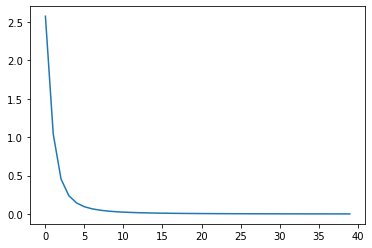

In [5]:
plt.plot(l_coef)

Θα κάνουμε χρήση των  πρώτων ιδιοτιμών για το KL-expansion. Το κριτήριο για την επιλογή των ιδιοτιμών είναι το όριο 5% της μέγιστης ιδιοτιμής <br> (περίπου 0.12). Συνεπώς, κρατάμε τις πρώτες 5 ιδιοτιμές. Ωστόσο, παρατηρούμε ότι το διάγραμμα των ιδιοτιμών δεν έχει συγκλίνει στις 5 πρώτες και για αυτό θα επιλέξουμε εν τέλει 8 ιδιοτιμές.


In [6]:
l_coef = l_coef[:8]

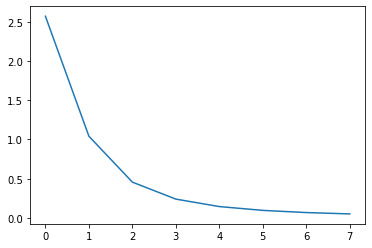

In [7]:
plt.plot(l_coef)

In [8]:
# ορισμός τύπου 2.19
def simulation(l_coef, phi):
    ksi = np.random.normal(size = len(l_coef))
    s = np.zeros((len(l_coef), len(phi[0])))
    for i in range(len(l_coef)):
        s[i,:] = sqrt(l_coef[i])*phi[i]*ksi[i]
    return np.sum(s, axis = 0)

In [9]:
def realization(realizations):
    sim = np.zeros((realizations, len(phi[0])))
    for i in tqdm(range(realizations), total = realizations):
        sim[i,:] = simulation(l_coef, phi)
    return sim

Οι δοκιμές θα γίνουν για διάφορες τιμές των realizations, ώστε να έχουμε καλύτερη εποπτεία της εξέλιξης του αλγορίθμου.

In [10]:
real_500 = realization(500)
real_2500 = realization(2500)
real_5000 = realization(5000)
real_10000 = realization(10000)
real_50000 = realization(50000)
real_500000 = realization(500000)

100%|███████████████████████████████████████████████████████████████████████| 500000/500000 [00:17<00:00, 28796.22it/s]


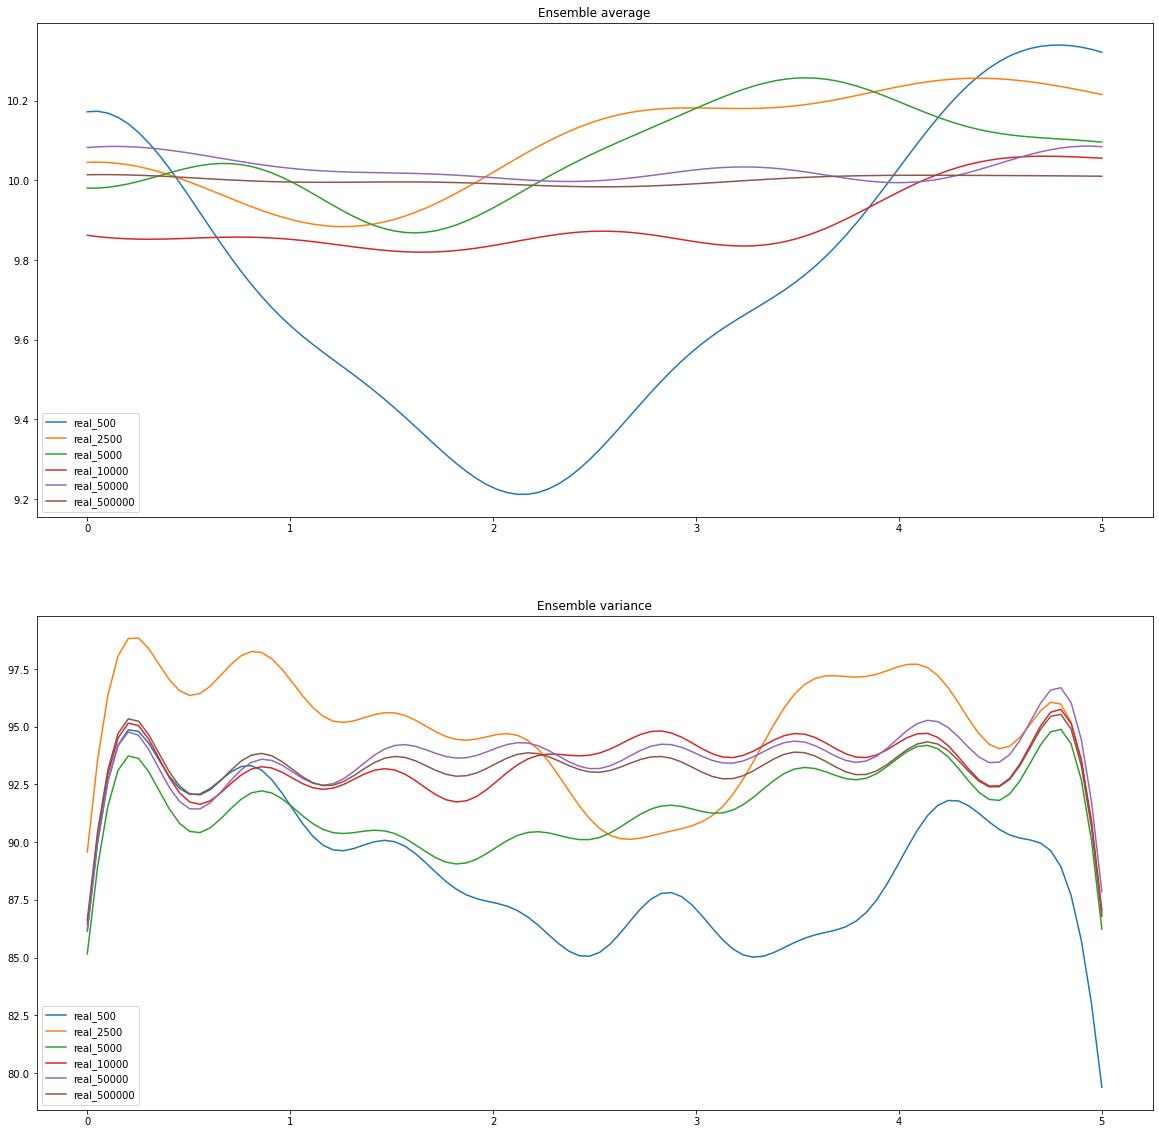

In [11]:
fig, axs = plt.subplots(2, 1, figsize = (20, 20))
data = [real_500, real_2500, real_5000, real_10000, real_50000, real_500000]
names = ["real_500", "real_2500", "real_5000", "real_10000", "real_50000", "real_500000"]
for d, name in zip(data, names):
    mu = np.mean(10 + 10*d, axis = 0)
    var = np.var(10 + 10*d, axis = 0)
    axs[0].plot(x + 2.5, mu, label = name)
    axs[1].plot(x + 2.5, var, label = name)
    axs[0].set_title("Ensemble average")
    axs[1].set_title("Ensemble variance")
    axs[0].legend(loc = "best")
    axs[1].legend(loc = "best")
plt.show()

Από την θεωρία γνωρίζουμε ότι η $E(x)$ θα έχει μέση τιμή $10$ και διασπορά $100$. Εν γένει παρατηρούμε ότι προσεγγίζονται οι θεωρητικές τιμές, όσο αυξάνεται το πλήθος των realizations. Η μέση τιμή συγκλίνει στο $10$, ενώ η διασπορά δεν έχει την ίδια ποιότητα σύγκλισης. Στην περίπτωση του variance έχουμε underestimation στο διάστημα $(90, 95)$ λόγω των λίγων που χρησιμοποιούμε. Οι έντονα έκτοπες τιμές στα άκρα οφείλονται στο φαινόμενο [Gibbs](https://en.wikipedia.org/wiki/Gibbs_phenomenon), διότι έχουμε άθροισμα ημιτονοειδών όρων.